# Image

In [4]:
from ultralytics import YOLO

# Load a model
model = YOLO("YoloRoad1.pt")  # pretrained YOLOv8n model

# Run batched inference on a list of images
#results = model(["Train/train129.jpg", "Train/train128.jpg", "Train/train127.jpg","Train/train126.jpg","Train/train125.jpg","Train/train124.jpg","Train/train123.jpg"])  # return a list of Results objects
source = "Train/train155.jpg"

#model.predict("Train/train155.jpg", save=True,show=True, imgsz = 224)
#model.predict("videoTest.mp4", save=True,show=True, imgsz = 224)
#for i in range(120, 131):
#    image_path = f"Train/train{i}.jpg"
#    model.predict(image_path, save=True, show=True,imgsz=224)

result = model(source, save=True , imgsz = 224, show = False , save_txt = True)


/home/wilson03/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:84.)
  return F.conv2d(input, weight, bias, self.stride,


image 1/1 /home/wilson03/Documents/Jetracer/Train/train155.jpg: 224x224 2 central_lines, 3 orange_lignes, 3.0ms
Speed: 0.5ms preprocess, 3.0ms inference, 57.6ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/segment/predict36
1 label saved to runs/segment/predict36/labels


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'central_line', 1: 'orange_ligne'}
obb: None
orig_img: array([[[ 33,  31,  31],
        [ 34,  32,  32],
        [ 36,  31,  32],
        ...,
        [139, 115, 125],
        [139, 115, 125],
        [138, 114, 124]],

       [[ 37,  35,  35],
        [ 37,  35,  35],
        [ 38,  33,  34],
        ...,
        [140, 116, 126],
        [139, 115, 125],
        [138, 114, 124]],

       [[ 36,  31,  33],
        [ 37,  32,  34],
        [ 36,  31,  33],
        ...,
        [139, 115, 125],
        [139, 115, 125],
        [138, 114, 124]],

       ...,

       [[131, 112, 115],
        [129, 110, 113],
        [131, 112, 115],
        ...,
        [115, 111, 147],
        [113, 111, 147],
        [110, 110, 146]],

       [[130, 112, 113],
        [128, 110, 111],
        [130, 112, 113],
        ...,
   

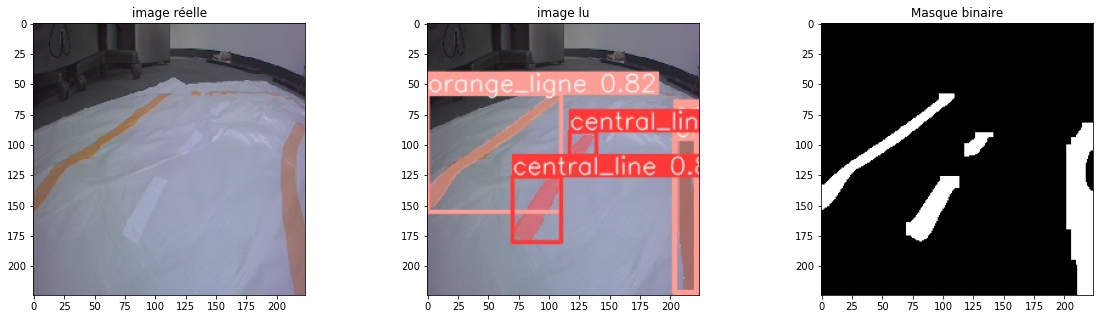

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
for i in result:
    print (i)
    coords = i.masks.xy
# Déterminer la taille de l'image (basée sur les coordonnées maximales)
    height = int(max([point[1] for contour in coords for point in contour]) + 1)
    width = int(max([point[0] for contour in coords for point in contour]) + 1)

# Créer une image vide (noire)
    mask = np.zeros((height, width), dtype=np.uint8)

# Dessiner chaque contour sur le masque
    for contour in coords:
        cv2.fillPoly(mask, [contour.astype(np.int32)], 255)

# Afficher le masque
    plt.figure(figsize=[20,5])
    image = cv2.imread("runs/segment/predict10/train155.jpg")
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image2 = cv2.imread("Train/train155.jpg")
    image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
    #plt.imshow(mask, cmap='gray')
    #mask = cv2.cvtColor(mask,cv2.COLOR_BAYER_BG2GRAY)
    plt.subplot(1,3,3);plt.imshow(mask,cmap='gray');plt.title("Masque binaire")
    plt.subplot(1,3,2);plt.imshow(image);plt.title("image lu")
    plt.subplot(1,3,1);plt.imshow(image2);plt.title("image réelle")

# Vidéo

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("YoloRoad1.pt")  # pretrained YOLOv8n model

source = "videoTest.mp4"

sortie = model(source, save=True , imgsz = 224, show = False)


In [ ]:
for s in sortie:
    print(s.masks.xy)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time


# Définir les paramètres de la vidéo
video_name = 'resultat_inference.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Utiliser le codec XVID
fps = 30.0  # Définir le nombre d'images par seconde

# Initialiser l'objet VideoWriter
video = cv2.VideoWriter(video_name, fourcc, fps, (224, 224))



for i in result:
    coords = i.masks.xy
# Déterminer la taille de l'image (basée sur les coordonnées maximales)
    height = int(max([point[1] for contour in coords for point in contour]) + 1)
    width = int(max([point[0] for contour in coords for point in contour]) + 1)

# Créer une image vide (noire)
    mask = np.zeros((height, width), dtype=np.uint8)

# Dessiner chaque contour sur le masque
    for contour in coords:
        cv2.fillPoly(mask, [contour.astype(np.int32)], 255)
    #mask = cv2.cvtColor(mask,cv2.COLOR_BAYER_BG2RGB)
    #plt.imshow(mask, cmap='gray')
    #plt.imshow(mask)
    out.write(mask, cmap='gray')

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Définir les paramètres de la vidéo
video_name = 'resultat_inference.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Utiliser le codec mp4v
fps = 30.0  # Définir le nombre d'images par seconde
frame_size = (224, 224)  # Taille fixe des frames

# Initialiser l'objet VideoWriter
video = cv2.VideoWriter(video_name, fourcc, fps, frame_size)

# Supposons que `result` est une liste de résultats de détection
result = [...]  # Votre liste de résultats

for i in sortie:
    coords = i.masks.xy
    
    # Déterminer la taille de l'image (basée sur les coordonnées maximales)
    height = int(max([point[1] for contour in coords for point in contour]) + 1)
    width = int(max([point[0] for contour in coords for point in contour]) + 1)

    # Créer une image vide (noire)
    mask = np.zeros((height, width), dtype=np.uint8)

    # Dessiner chaque contour sur le masque
    for contour in coords:
        cv2.fillPoly(mask, [contour.astype(np.int32)], 255)
    
    # Redimensionner le masque à la taille de la frame vidéo
    mask_resized = cv2.resize(mask, frame_size)
    
    # Convertir le masque en 3 canaux
    mask_rgb = cv2.cvtColor(mask_resized, cv2.COLOR_GRAY2BGR)
    
    # Écrire le masque dans la vidéo
    video.write(mask_rgb)

# Libérer l'objet VideoWriter
video.release()

print("Vidéo créée avec succès!")


In [ ]:
from moviepy.editor import VideoFileClip, clips_array

# Charger les vidéos
clip1 = VideoFileClip("videoTest.mp4").resize((224, 224))
clip2 = VideoFileClip("runs/segment/predict16/videoTest.avi").resize((224, 224))
clip3 = VideoFileClip("resultat_inference.mp4").resize((224, 224))

# Créer un arrangement horizontal des clips
final_clip = clips_array([[clip1, clip2, clip3]])

# Sauvegarder la vidéo résultante
final_clip.write_videofile("demo.mp4", codec="libx264")


In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
for i in result:
    print (i)

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'central_line', 1: 'orange_ligne'}
obb: None
orig_img: array([[[ 33,  31,  31],
        [ 34,  32,  32],
        [ 36,  31,  32],
        ...,
        [139, 115, 125],
        [139, 115, 125],
        [138, 114, 124]],

       [[ 37,  35,  35],
        [ 37,  35,  35],
        [ 38,  33,  34],
        ...,
        [140, 116, 126],
        [139, 115, 125],
        [138, 114, 124]],

       [[ 36,  31,  33],
        [ 37,  32,  34],
        [ 36,  31,  33],
        ...,
        [139, 115, 125],
        [139, 115, 125],
        [138, 114, 124]],

       ...,

       [[131, 112, 115],
        [129, 110, 113],
        [131, 112, 115],
        ...,
        [115, 111, 147],
        [113, 111, 147],
        [110, 110, 146]],

       [[130, 112, 113],
        [128, 110, 111],
        [130, 112, 113],
        ...,
   